<a href="https://colab.research.google.com/github/AlexandreXavierMartins/ProblemaDaMochila/blob/main/Clonal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install ypstruct

  Preparing metadata (setup.py) ... done
  Created wheel for ypstruct: filename=ypstruct-0.0.2-py3-none-any.whl size=2952 sha256=e9c5b0c226548abbbb843add5661f4c3fb7b3ec9282b7761bc520b7cfa82995b
  Stored in directory: /root/.cache/pip/wheels/06/01/e9/d86f23cca6d6caa8e0e9916202c43561cab19cffc20be70ac1
Successfully built ypstruct


struct({'vetor': [0, 1, 1, 0, 1, 1, 1, 1], 'fo': 7})
struct({'vetor': [1, 1, 1, 0, 0, 1, 0, 0], 'fo': 12})
struct({'vetor': [0, 0, 0, 1, 0, 1, 1, 0], 'fo': 14})
struct({'vetor': [0, 1, 1, 1, 1, 0, 1, 0], 'fo': 6})
struct({'vetor': [1, 0, 1, 1, 0, 1, 1, 0], 'fo': 10})
struct({'vetor': [0, 1, 0, 1, 1, 1, 1, 1], 'fo': -1})
struct({'vetor': [0, 1, 0, 1, 1, 1, 1, 0], 'fo': 9})
struct({'vetor': [1, 0, 0, 1, 1, 0, 1, 0], 'fo': 9})
struct({'vetor': [1, 0, 0, 0, 0, 0, 1, 1], 'fo': 13})
struct({'vetor': [0, 0, 0, 1, 1, 0, 1, 0], 'fo': 13})
struct({'vetor': [0, 0, 0, 1, 0, 1, 1, 0], 'fo': 14})
Geração  0
População Ordenada
struct({'vetor': [0, 0, 1, 1, 0, 1, 1, 0], 'fo': 16})
struct({'vetor': [0, 1, 0, 1, 0, 1, 1, 0], 'fo': 15})
struct({'vetor': [0, 0, 0, 1, 0, 1, 1, 0], 'fo': 14})
struct({'vetor': [0, 0, 0, 1, 1, 1, 1, 0], 'fo': 14})
struct({'vetor': [1, 0, 0, 1, 0, 1, 1, 0], 'fo': 14})

Melhorou
struct({'vetor': [0, 0, 1, 1, 0, 1, 1, 0], 'fo': 16})
Geração  1
População Ordenada
struct({'vetor':

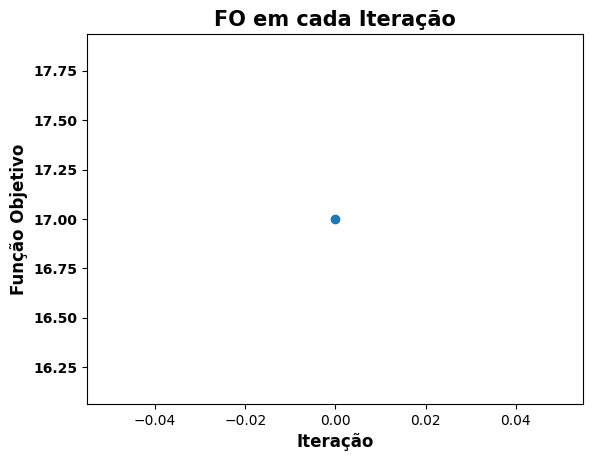

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt
from ypstruct import structure

def calcula_fo(b, p, s, n, cap, pena):
  fo = 0
  pt = 0
  for i in range(n):
    fo = fo + s[i]*b[i]
    pt = pt + s[i]*p[i]
  if pt > cap:
    #print('Solução inviável')
    fo = fo -pena*(pt - cap)
  return fo

def gera_sol(s, n):
  for i in range(n):
    s[i] = np.random.randint(0, 2)
  return s


#DADOS DO PROBLEMA-------------------#
n = 8 #Quantidade de objetos
beneficio = [4, 3, 2, 6, 2, 3, 5, 4]
peso =      [5, 4, 3, 9, 4, 2, 6, 7]
cap = 20 #Capacidade da mochila
#------------------------------------#
#ESTATÍSTICAS------------------------#
fo_inicial = []
fo_final = []
xlabel = []
media = 0
#------------------------------------#
#PARÂMETROS--------------------------#
penalidade = 2 #Penalidade por solução inviável


maxit = 2*n
npop = 10
Maxclones = n
#------------------------------------#

experimentos = 1
#Estrutura da Solução
antigeno = structure()
antigeno.vetor = None #Vetor com a solução que pode ser localizada pelo id
antigeno.fo = None #Função objetivo de cada solução

for seed in range(experimentos):
  xlabel.append(seed)
  np.random.seed(seed)
  #Geração Inicial
  pop = antigeno.repeat(npop) #Cria npop indivíduos
  #Cria um indivíduo que guarda a melhor solução
  bestsol = antigeno
  bestsol.vetor = n*[0]
  bestsol.fo = -np.inf
  for i in range(npop):
    pop[i].vetor = n*[0]
    pop[i].vetor = gera_sol(pop[i].vetor, n)
    pop[i].fo = calcula_fo(beneficio, peso, pop[i].vetor, n, cap, penalidade)
    if pop[i].fo > bestsol.fo:
      #print('Melhorou')
      bestsol = pop[i].deepcopy()
    print(pop[i])
  #print(pop)
  print(bestsol)
  #LOOP
  for it in range(maxit):
    #Ordena e clona as n/2 melhores soluções
    clones = Maxclones
    print('Geração ', it)
    pop = sorted(pop, key=lambda x: x.fo, reverse = True)
    NumMutations = 1
    for i in range(npop//2):
      #Para cada antigeno gera C clones

      #cria vetor ordenado aleatoriamente com posições entre 0 e (n-1)
      pos = np.random.permutation(n)
      j = 0
      for c in range(clones):
        Clone = antigeno
        Clone = pop[i].deepcopy()
        #HiperMutação
        #print(pop[i])
        #print('clone = ', Clone)
        #print('NumMutations', NumMutations)
        #print('NumClones', clones)
        for k in range(NumMutations):
          if j >= n:
            j = 0
            pos = np.random.permutation(n)
          bit = pos[j]
          j = j + 1
          Clone.vetor[bit] = 1 - Clone.vetor[bit]
        Clone.fo = calcula_fo(beneficio, peso, Clone.vetor, n, cap, penalidade)
        #print('Clone apos mutação', Clone)
        pop.append(Clone)
        #Pausa até uma tecla ser acionada
        #input()

      NumMutations = NumMutations + 1
      clones = clones - 1

      #Fim da mutação

    #print(pop)
    #Ordena e Seleciona
    pop = sorted(pop, key=lambda x: x.fo, reverse = True)
    pop = pop[0:npop//2]
    print('População Ordenada')
    for i in range(len(pop)):
      print(pop[i])
    input()
    for i in range(npop//2):
      novo = antigeno
      novo.vetor = n*[0]
      novo.vetor = gera_sol(novo.vetor, n)
      novo.fo = calcula_fo(beneficio, peso, novo.vetor, n, cap, penalidade)
      pop.append(novo)
    pop = sorted(pop, key=lambda x: x.fo, reverse = True)
    #print('População')
    if pop[0].fo > bestsol.fo:
      print('Melhorou')
      bestsol = pop[0].deepcopy()
      print(bestsol)

  media = media + bestsol.fo
  fo_final.append(bestsol.fo)

media = media/experimentos
#print('Melhor solução = ', fo_star)
#print('Melhor iteração =', best_iter)
print('Média = ', media)
#plt.scatter(xlabel, fo_inicial)
plt.scatter(xlabel, fo_final)
plt.title("FO em cada Iteração", fontsize = 15, fontweight = 'bold')
plt.xlabel("Iteração", fontsize = 12, fontweight = 'bold')
plt.ylabel("Função Objetivo", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight='bold')
plt.show()


In [2]:
import numpy as np
x = np.random.permutation(3)
print(x)

[2 1 0]
